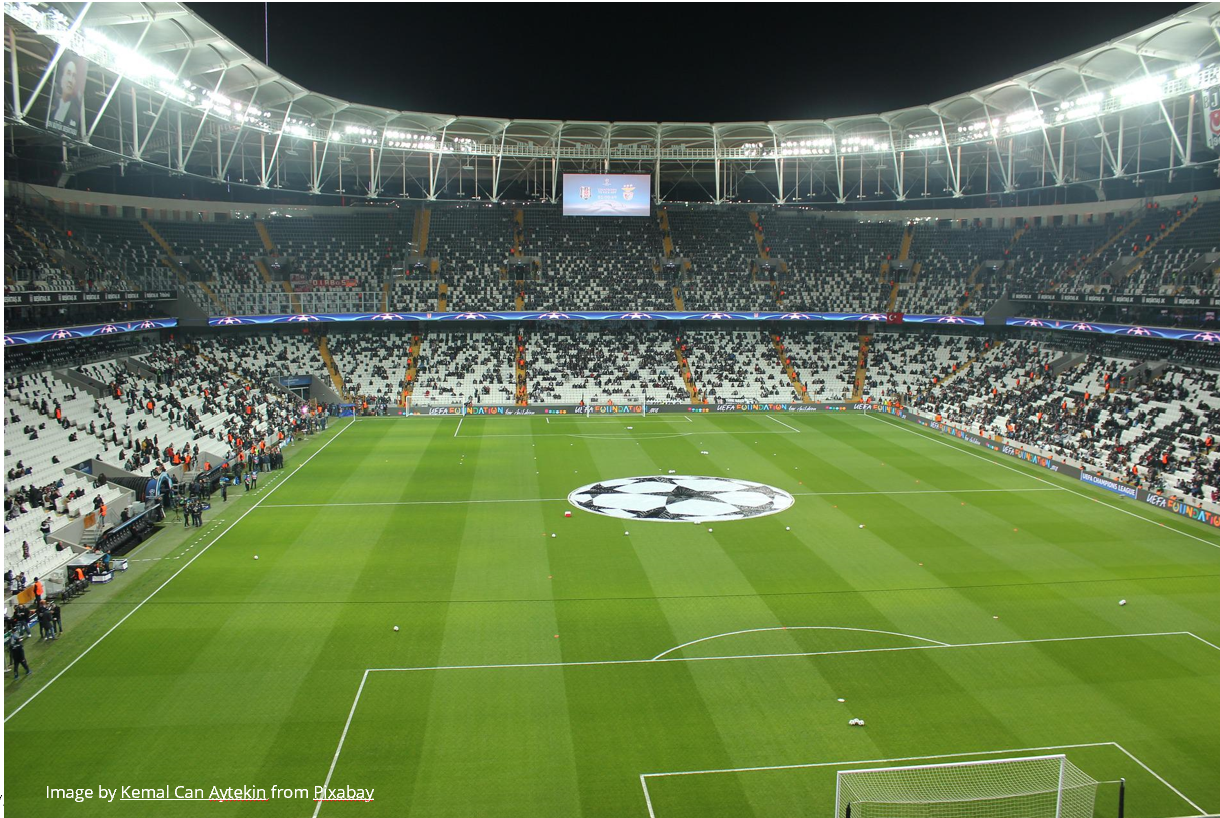

## Provide details on connection status using request

In [2]:
# import these two modules bs4 for selecting HTML tags easily
from bs4 import BeautifulSoup
import requests

In [3]:
#Requests module use to data from given url
url = "https://www.uefa.com/uefachampionsleague/news/0273-14a076282e68-eac8f8c8c071-1000--real-madrid-3-1-paris-agg-3-2-benzema-hat-trick-earns-comeback-/" #UEFA Champions League News
source=requests.get(url).text
#source.text #check the get request form url

In [4]:
url #check on the url

'https://www.uefa.com/uefachampionsleague/news/0273-14a076282e68-eac8f8c8c071-1000--real-madrid-3-1-paris-agg-3-2-benzema-hat-trick-earns-comeback-/'

## Parse the content from the requests

In [5]:
soup = BeautifulSoup(source,'html.parser')
print(soup.prettify()) #prettify = indentation for clearer reading

<!DOCTYPE html>
<html data-culture="en-GB" data-lang="en" lang="en">
 <head prefix="og: http://ogp.me/ns# fb: http://ogp.me/ns/fb# website: http://ogp.me/ns/website# ">
  <title>
   Real Madrid 3-1 Paris (agg: 3-2): Benzema hat-trick earns comeback win | UEFA Champions League | UEFA.com
  </title>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <meta charset="utf-8"/>
  <meta content="Karim Benzema scored a second-half hat-trick as the Spanish side came from two down to snatch a quarter-final spot from Paris Saint-Germain's grasp." name="description"/>
  <meta content="UEFA.com" name="author"/>
  <meta content="true" name="HandheldFriendly"/>
  <meta content="320" name="MobileOptimized"/>
  <meta content="UEFA.com" name="application-name"/>
  <meta content="yes" name="apple-mobile-web-app-capable"/>
  <meta content="UEFA.com" name="apple-mobile-web-app-title"/>
  <meta content="#ffffff" name="theme-color"

In [6]:
type(BeautifulSoup(source,'html.parser'))

bs4.BeautifulSoup

In [7]:
import re #Use Regex to remove symbols and unwanted elements 
soup = BeautifulSoup(source,"html.parser")
text = soup.get_text(strip=True)
text_to_read = re.sub(r'[^\w]', ' ', text) # cleaning of unwanted items such as spaces etc
text_to_read

'Real Madrid 3 1 Paris  agg  3 2   Benzema hat trick earns comeback win   UEFA Champions League   UEFA comUEFA com works better on other browsersFor the best possible experience  we recommend usingChrome FirefoxorMicrosoft Edge Inside UEFAUEFA tvLive scoresTickets and hospitalityStoreUEFA Club competitionsThe official licensed stores are operated by 3rd party commercial partners appointed under license by UEFA LoginFavourite clubAll sectionsHomeUEFA Champions LeagueUEFA Europa LeagueUEFA Europa Conference LeagueUEFA Women s Champions LeagueUEFA Women s EUROUEFA Youth LeagueDomestic European competitionsDomestic European competitionsLive scoresTV GuideUEFA tvCompetitionsCompetitionsClubsUEFA Champions LeagueUEFA Europa LeagueUEFA Europa Conference LeagueUEFA Super CupUEFA Youth LeagueNationalEuropean QualifiersUEFA EURO 2020UEFA EURO 2024UEFA Nations LeagueFinalissimaUnder 21Youth   AmateurUnder 19Under 17UEFA Regions  CupWomenUEFA Women s EUROFIFA Women s World CupUEFA Women s Champion

## Use two different parsers and providing observations.

In [8]:
lxml_parse = BeautifulSoup(source,'lxml') # Using lxml
print(lxml_parse)
#print(lxml_parse.prettify()) #prettify = indentation for clearer reading

<!DOCTYPE html>
<html data-culture="en-GB" data-lang="en" lang="en">
<head prefix="og: http://ogp.me/ns# fb: http://ogp.me/ns/fb# website: http://ogp.me/ns/website# ">
<title>Real Madrid 3-1 Paris (agg: 3-2): Benzema hat-trick earns comeback win | UEFA Champions League | UEFA.com</title>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta charset="utf-8"/>
<meta content="Karim Benzema scored a second-half hat-trick as the Spanish side came from two down to snatch a quarter-final spot from Paris Saint-Germain's grasp." name="description"/>
<meta content="UEFA.com" name="author"/>
<meta content="true" name="HandheldFriendly"/>
<meta content="320" name="MobileOptimized"/>
<meta content="UEFA.com" name="application-name"/>
<meta content="yes" name="apple-mobile-web-app-capable"/>
<meta content="UEFA.com" name="apple-mobile-web-app-title"/>
<meta content="#ffffff" name="theme-color"/>
<meta content="Real Madrid 3-

In [9]:
html5lib_parse = BeautifulSoup(source,'html5lib') # Using html5lib
print(html5lib_parse)
#print(html5lib_parse.prettify()) #prettify = indentation for clearer reading

<!DOCTYPE html>
<html data-culture="en-GB" data-lang="en" lang="en"><head prefix="og: http://ogp.me/ns# fb: http://ogp.me/ns/fb# website: http://ogp.me/ns/website# ">
  <title>Real Madrid 3-1 Paris (agg: 3-2): Benzema hat-trick earns comeback win | UEFA Champions League | UEFA.com</title>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <meta charset="utf-8"/>
  <meta content="Karim Benzema scored a second-half hat-trick as the Spanish side came from two down to snatch a quarter-final spot from Paris Saint-Germain's grasp." name="description"/>
  <meta content="UEFA.com" name="author"/>
  <meta content="true" name="HandheldFriendly"/>
  <meta content="320" name="MobileOptimized"/>
  <meta content="UEFA.com" name="application-name"/>
  <meta content="yes" name="apple-mobile-web-app-capable"/>
  <meta content="UEFA.com" name="apple-mobile-web-app-title"/>
  <meta content="#ffffff" name="theme-color"/>
  <met

## Observation for the different parsers.
### 1. **The formatting looks different between lxml and html5lib as shown below.**

### Lxml
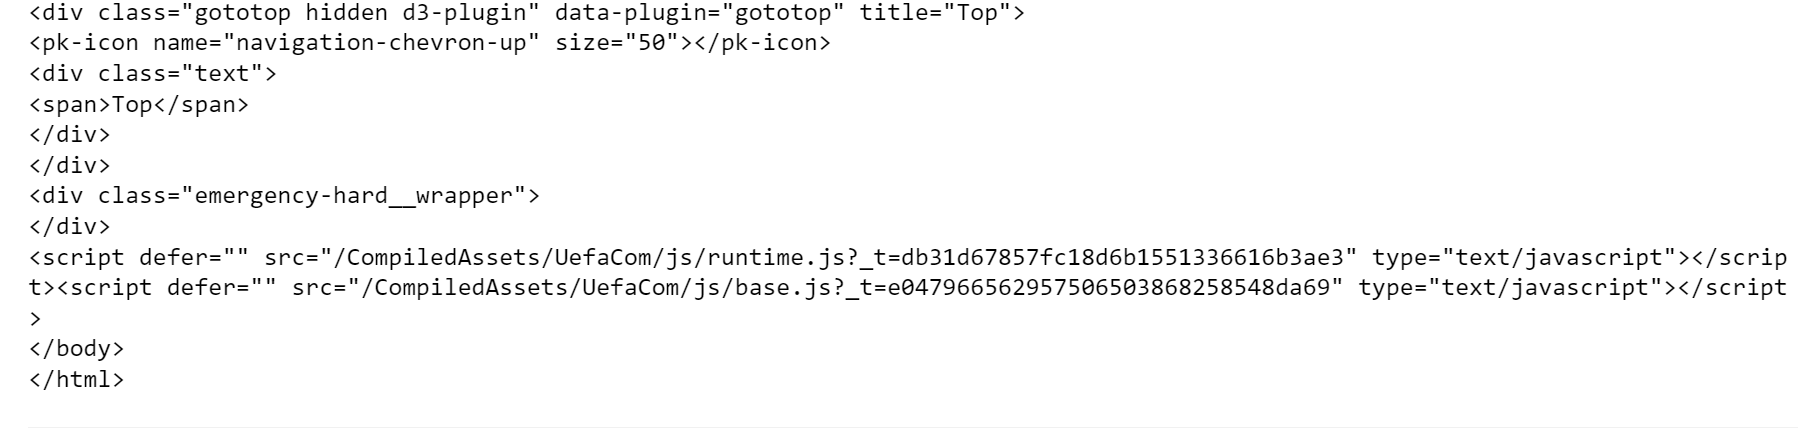

### Html5lib
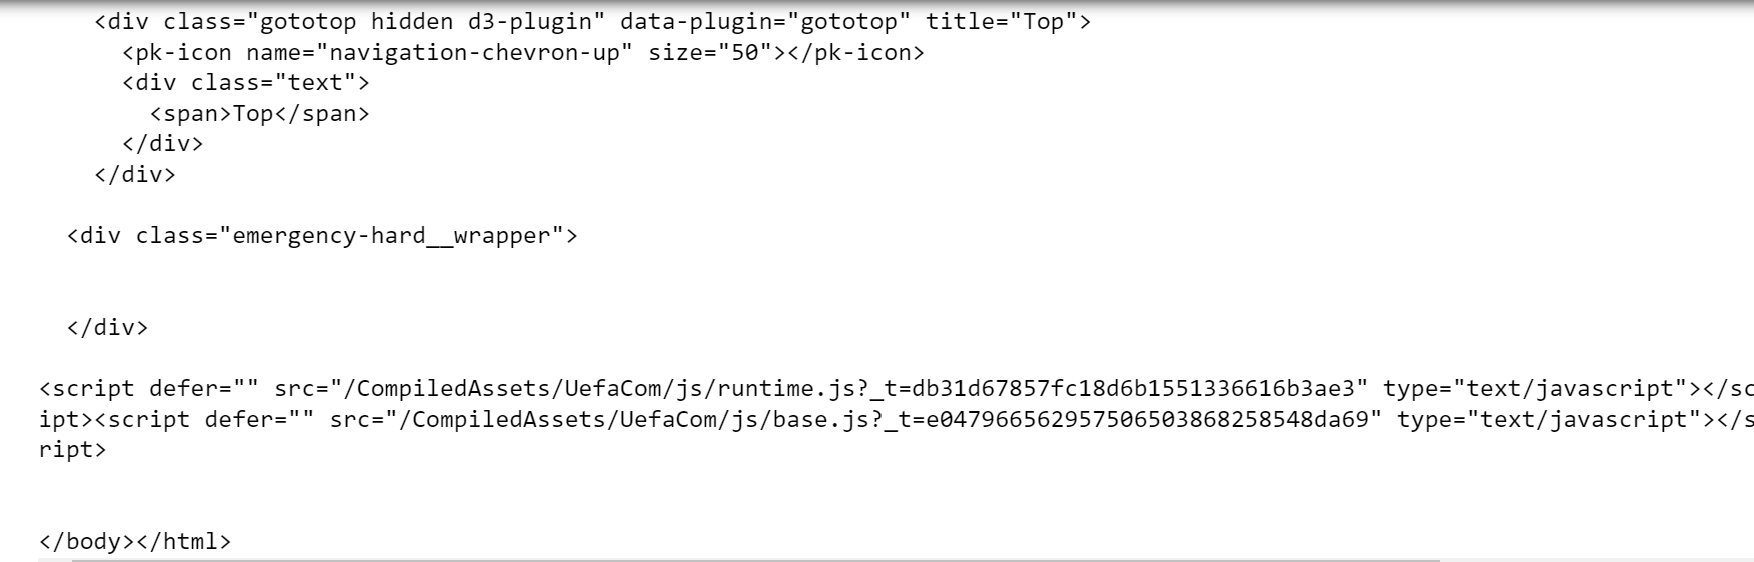


### 2. Lxml is faster as compared to html5lib

In [10]:
%%timeit
html5lib_parse = BeautifulSoup(source,'html5lib') #Checking for speed of html5lib

145 ms ± 21.4 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [11]:
%%timeit
lxml_parse = BeautifulSoup(source,'lxml') #Checking for speed of lxml

30.1 ms ± 2.43 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


## Extract the page titles

In [12]:
#extract the page title
title=soup.find('title')
qwery=soup.find('title') 

print("The page title with html tags :",title)#extract the page title with html
print("The page title is :",qwery.text) 

The page title with html tags : <title>Real Madrid 3-1 Paris (agg: 3-2): Benzema hat-trick earns comeback win | UEFA Champions League | UEFA.com</title>
The page title is : Real Madrid 3-1 Paris (agg: 3-2): Benzema hat-trick earns comeback win | UEFA Champions League | UEFA.com


## Identify the tag which has the headlines and sub headlines and extract them 

### 1. Retrieve contents from a portion of the web page

In [13]:
soup # Checking on the div class


<!DOCTYPE html>

<html data-culture="en-GB" data-lang="en" lang="en">
<head prefix="og: http://ogp.me/ns# fb: http://ogp.me/ns/fb# website: http://ogp.me/ns/website# ">
<title>Real Madrid 3-1 Paris (agg: 3-2): Benzema hat-trick earns comeback win | UEFA Champions League | UEFA.com</title>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta charset="utf-8"/>
<meta content="Karim Benzema scored a second-half hat-trick as the Spanish side came from two down to snatch a quarter-final spot from Paris Saint-Germain's grasp." name="description"/>
<meta content="UEFA.com" name="author"/>
<meta content="true" name="HandheldFriendly"/>
<meta content="320" name="MobileOptimized"/>
<meta content="UEFA.com" name="application-name"/>
<meta content="yes" name="apple-mobile-web-app-capable"/>
<meta content="UEFA.com" name="apple-mobile-web-app-title"/>
<meta content="#ffffff" name="theme-color"/>
<meta content="Real Madrid 

In [14]:
# Checking on the div class
headlines = soup.find('div',{'class':'ie-deprecation-banner'})
headlines

<div class="ie-deprecation-banner">
<img alt="UEFA.COM" class="ie-deprecation-banner__logo" loading="lazy" src="https://img.uefa.com/imgml/uefacom/elements/main-nav/uefa-logo-black.svg" title="UEFA.COM"/>
<div class="ie-deprecation-banner__title">UEFA.com works better on other browsers</div>
<div class="ie-deprecation-banner__text">For the best possible experience, we recommend using <a href="https://www.google.com/chrome/">Chrome</a>, <a href="https://www.mozilla.org/firefox/">Firefox</a> or <a href="https://www.microsoft.com/edge">Microsoft Edge</a>.</div>
</div>

**Since retrieving from a portion of the web page above does not meet the goals of having sufficient headlines and sub headlines to explore on, we will focus on extracting the headlines and sublines from the main webpage.**

### 2. Finding all headlines and sublines and extract them from the webpage

In [15]:
titles = soup.find_all(['h1', 'h2','h3']) # Finding all the headlines and sub headlines
print([title for title in titles])

[<h1 class="article_headline">Real Madrid 3-1 Paris (agg: 3-2): Benzema hat-trick earns comeback win</h1>, <h2 class="hidden">Article summary</h2>, <h2 class="hidden">Article top media content</h2>, <h2 class="hidden">Article body</h2>, <h3><b>Match in brief: Benzema leads from the front</b></h3>, <h3><b>PlayStation® Player of the Match: Karim Benzema (Real Madrid)</b></h3>, <h3><b>Graham Hunter, Real Madrid reporter</b></h3>, <h3><b>Ian Holyman, Paris reporter </b></h3>, <h3><b>Reaction </b></h3>, <h3><b>Key stats</b></h3>, <h3><a href="https://gaming.uefa.com/en/uclfantasy" target="_self"><b>Fantasy star performers</b></a></h3>, <h3><b>Line-ups</b></h3>, <h2 class="section--title h2">
      notitle

      </h2>, <h2 class="section--title h2">
      Selected for you

      </h2>, <h2 class="article--title">
        Champions League hat-tricks
      </h2>, <h2 class="article--title">
        Draw: all you need to know
      </h2>, <h3 class="navbar-competitions-title">Also visit</h3>, 

In [16]:
h1 = soup.find_all(['h1']) # Finding all H1 for headlines
print([title for title in h1])

[<h1 class="article_headline">Real Madrid 3-1 Paris (agg: 3-2): Benzema hat-trick earns comeback win</h1>]


In [17]:
len(h1) #Checking for the total number of h1

1

In [18]:
h2 = soup.find_all(['h2']) # Finding all H2 for sub headlines
print([title for title in h2])

[<h2 class="hidden">Article summary</h2>, <h2 class="hidden">Article top media content</h2>, <h2 class="hidden">Article body</h2>, <h2 class="section--title h2">
      notitle

      </h2>, <h2 class="section--title h2">
      Selected for you

      </h2>, <h2 class="article--title">
        Champions League hat-tricks
      </h2>, <h2 class="article--title">
        Draw: all you need to know
      </h2>, <h2 class="hidden">Social and apps links</h2>, <h2 class="hidden">Services links and disclaimer</h2>]


In [19]:
len(h2) #Checking for the total number of h2

9

In [20]:
h3 = soup.find_all(['h3']) # Finding all H3 for other sub headlines in the page
print([title for title in h3])

[<h3><b>Match in brief: Benzema leads from the front</b></h3>, <h3><b>PlayStation® Player of the Match: Karim Benzema (Real Madrid)</b></h3>, <h3><b>Graham Hunter, Real Madrid reporter</b></h3>, <h3><b>Ian Holyman, Paris reporter </b></h3>, <h3><b>Reaction </b></h3>, <h3><b>Key stats</b></h3>, <h3><a href="https://gaming.uefa.com/en/uclfantasy" target="_self"><b>Fantasy star performers</b></a></h3>, <h3><b>Line-ups</b></h3>, <h3 class="navbar-competitions-title">Also visit</h3>, <h3 class="navbar-competitions-title">Tools</h3>, <h3 class="navbar-competitions-title">Change language</h3>]


In [21]:
len(h3) #Checking for the total number of h3

11

In [22]:
a_href = soup.find_all('a', href = True)# Finding all 'a href' in the webpage
print([title for title in a_href])

[<a href="https://www.google.com/chrome/">Chrome</a>, <a href="https://www.mozilla.org/firefox/">Firefox</a>, <a href="https://www.microsoft.com/edge">Microsoft Edge</a>, <a class="navbar-brand hidden-xs js-tracking-link" data-scope="Header" data-tracking='{"action":"Menu - Level 1 - Access UEFA.com logo","label":"navigation","category":"Click"}' href="/">
<img alt="UEFA.COM" class="pflazyload" data-srcset="https://img.uefa.com/imgml/uefacom/elements/main-nav/uefa-logo-black.svg?imwidth=36" height="18" srcset="https://img.uefa.com/imgml/void.svg" title="UEFA.COM" width="102"/>
</a>, <a class="js-tracking-link" data-tracking='{"action":"Menu - Level 1 - Access Inside UEFA","label":"navigation","category":"Click"}' href="/insideuefa/" rel="noopener">
Inside UEFA                          </a>, <a class="js-tracking-link" data-tracking='{"action":"Menu - Level 1 - Access UEFA.tv","label":"navigation","category":"Click"}' href="https://www.uefa.tv/" rel="noopener">
UEFA.tv                  

In [23]:
for title in titles:
    print(title.text.strip())
    #print('\n'*3)


#for title in titles:
    #sub_headlines_1 = titles.find("h2", class_ = "hidden")
    #sub_headlines_2 = titles.find("h3", class_ = "")
    #print(title.text.strip())
    #print(sub_headlines_1.text)
    #print(sub_headlines_2.text.strip())
    # print('\n'*3)    

Real Madrid 3-1 Paris (agg: 3-2): Benzema hat-trick earns comeback win
Article summary
Article top media content
Article body
Match in brief: Benzema leads from the front
PlayStation® Player of the Match: Karim Benzema (Real Madrid)
Graham Hunter, Real Madrid reporter
Ian Holyman, Paris reporter
Reaction
Key stats
Fantasy star performers
Line-ups
notitle
Selected for you
Champions League hat-tricks
Draw: all you need to know
Also visit
Tools
Change language
Social and apps links
Services links and disclaimer


In [355]:
len(soup.find_all('a', href = True)) #Checking for the total number of a href in the webpage

137

## Other Observations

### Use NLTK package to check the frequency of words in the page

In [ ]:
import nltk
nltk.download('stopwords')
tokens = [t for t in text.split()]
 
freq = nltk.FreqDist(tokens)
 
for key,val in freq.items():
 
    print (str(key) + ':' + str(val))

In [357]:
from nltk.corpus import stopwords
 
#stopwords.words('english')

clean_tokens = tokens[:]
 
sr = stopwords.words('english')
 
for token in tokens:
 
    if token in stopwords.words('english'):
 
        clean_tokens.remove(token)


In [358]:
clean_tokens

['Real',
 'Madrid',
 '3-1',
 'Paris',
 '(agg:',
 '3-2):',
 'Benzema',
 'hat-trick',
 'earns',
 'comeback',
 'win',
 '|',
 'UEFA',
 'Champions',
 'League',
 '|',
 'UEFA.comUEFA.com',
 'works',
 'better',
 'browsersFor',
 'best',
 'possible',
 'experience,',
 'recommend',
 'usingChrome,FirefoxorMicrosoft',
 'Edge.Inside',
 'UEFAUEFA.tvLive',
 'scoresTickets',
 'hospitalityStoreUEFA',
 'Club',
 'competitionsThe',
 'official',
 'licensed',
 'stores',
 'operated',
 '3rd',
 'party',
 'commercial',
 'partners',
 'appointed',
 'license',
 'UEFA.LoginFavourite',
 'clubAll',
 'sectionsHomeUEFA',
 'Champions',
 'LeagueUEFA',
 'Europa',
 'LeagueUEFA',
 'Europa',
 'Conference',
 'LeagueUEFA',
 "Women's",
 'Champions',
 'LeagueUEFA',
 "Women's",
 'EUROUEFA',
 'Youth',
 'LeagueDomestic',
 'European',
 'competitionsDomestic',
 'European',
 'competitionsLive',
 'scoresTV',
 'GuideUEFA.tvCompetitionsCompetitionsClubsUEFA',
 'Champions',
 'LeagueUEFA',
 'Europa',
 'LeagueUEFA',
 'Europa',
 'Conference',


In [359]:
freq = nltk.FreqDist(clean_tokens)
 
for key,val in freq.items():
 
    print (str(key) + ':' + str(val))

Real:8
Madrid:10
3-1:5
Paris:12
(agg::3
3-2)::3
Benzema:14
hat-trick:6
earns:3
comeback:3
win:2
|:2
UEFA:7
Champions:16
League:10
UEFA.comUEFA.com:1
works:1
better:4
browsersFor:1
best:2
possible:1
experience,:1
recommend:1
usingChrome,FirefoxorMicrosoft:1
Edge.Inside:1
UEFAUEFA.tvLive:1
scoresTickets:1
hospitalityStoreUEFA:1
Club:5
competitionsThe:1
official:1
licensed:1
stores:1
operated:1
3rd:1
party:1
commercial:2
partners:1
appointed:1
license:1
UEFA.LoginFavourite:1
clubAll:1
sectionsHomeUEFA:1
LeagueUEFA:9
Europa:4
Conference:2
Women's:6
EUROUEFA:1
Youth:2
LeagueDomestic:1
European:4
competitionsDomestic:1
competitionsLive:2
scoresTV:2
GuideUEFA.tvCompetitionsCompetitionsClubsUEFA:1
Super:1
CupUEFA:2
LeagueNationalEuropean:1
QualifiersUEFA:1
EURO:2
2020UEFA:1
2024UEFA:1
Nations:1
LeagueUnder-21Youth:1
&:3
AmateurUnder-19Under-17UEFA:1
Regions':1
CupWomenUEFA:1
EUROFIFA:2
World:2
LeagueWomen's:1
Under-19Women's:1
Under-17FutsalFutsal:1
Futsal:3
CupFutsal:1
EUROUnder-19:1
EUROInsi

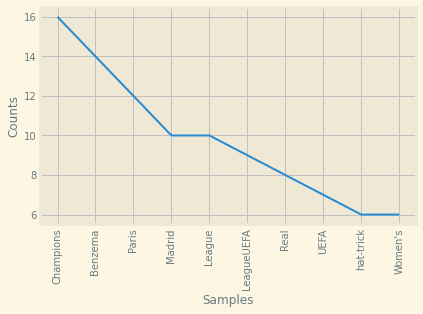

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [368]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("Solarize_Light2")
freq.plot(10, cumulative=False)